In [317]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd

In [318]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [319]:
from sklearn.model_selection import train_test_split

In [320]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= .2,random_state = 41)

In [321]:
class Perceptron:
    def __init__(self,lrate=.1,epochs=1000):
        self.lrate = lrate
        self.epochs = epochs
        self.weights = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        weights = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            idx = np.random.randint(0,X_train.shape[0])
            y_hat = step(np.dot(X_train[idx],weights))
            weights = weights + self.lrate*(y_train[idx] - y_hat)*(X_train[idx])
        self.weights = weights
    def predict(self,X_test):
        X_test = np.insert(X_test,0,1,axis=1)
        ans = np.dot(X_test,self.weights)
        return ans

In [322]:
class PerceptronSig:
    def __init__(self,lrate=.1,epochs=1000):
        self.lrate = lrate
        self.epochs = epochs
        self.weights = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1)
        weights = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            idx = np.random.randint(0,X_train.shape[0])
            y_hat = Sigmoid(np.dot(X_train[idx],weights))
            weights = weights + self.lrate*(y_train[idx] - y_hat)*(X_train[idx])
        self.weights = weights
    def predict(self,X_test):
        X_test = np.insert(X_test,0,1,axis=1)
        ans = np.dot(X_test,self.weights)
        return ans

In [323]:
def step(x):
    if x>0:
        return 1
    else:
        return 0

In [324]:
def Sigmoid(x):
    return 1/(1+np.exp(-x))

In [347]:
log_reg = Perceptron()

In [348]:
log_reg.fit(X_train,y_train)

In [349]:
np.where((log_reg.predict(X_test)) > 0, 1, 0)

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [350]:
y_test

array([0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [351]:
log_reg.weights

array([1.2       , 1.08682872, 0.52024363])

In [352]:
line_m_st = -(log_reg.weights[1]/log_reg.weights[2])
line_b_st = -(log_reg.weights[0]/log_reg.weights[2])


In [354]:
x_i = np.linspace(-3, 3, 100)
y_line_st = line_m*x_i + line_b_st


In [355]:
import matplotlib.pyplot as plt

(-3.0, 2.0)

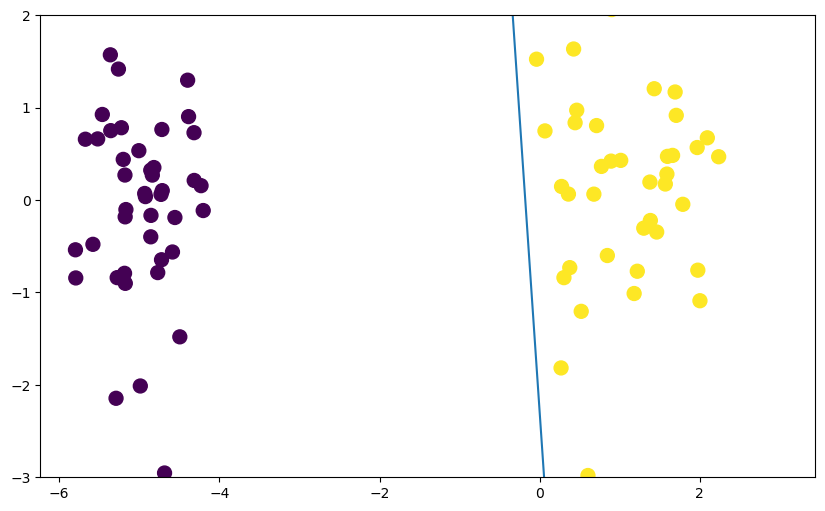

In [356]:
plt.figure(figsize=(10,6))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,s=100)
plt.plot(x_i,y_line_st)
plt.ylim(-3,2)
# plt.figure(figsize=(10,6))
# plt.plot(x_input,y_input,color='red',linewidth=3)
# plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='winter',s=100)
# plt.ylim(-3,2)

In [357]:
sig = PerceptronSig()

In [358]:
sig.fit(X_train,y_train)

In [359]:
line_m = -(sig.weights[1]/sig.weights[2])
line_b = -(sig.weights[0]/sig.weights[2])

line_m,line_b

(-12.06607171852618, -13.882821591264092)

In [360]:
x_i = np.linspace(-3, 3, 100)
y_line = line_m*x_i + line_b


In [363]:
from sklearn.linear_model import LogisticRegression

In [374]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.coef_
lr.intercept_
line_m_lr = -(lr.coef_.ravel()[0]/lr.coef_.ravel()[1])
line_b_lr = -(lr.intercept_/lr.coef_.ravel()[1])

In [375]:
y_line_lr = line_m_lr*x_i + line_b_lr 

(-3.0, 2.0)

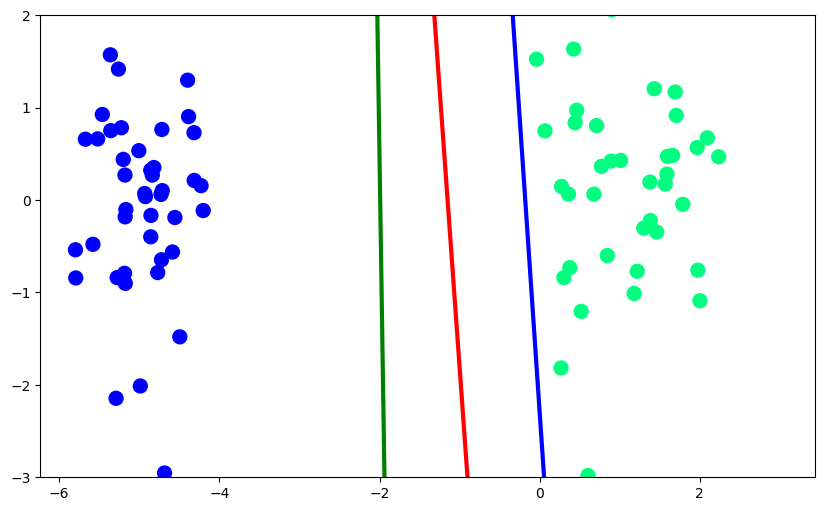

In [377]:
plt.figure(figsize=(10,6))
plt.plot(x_i,y_line,color='red',linewidth=3)
plt.plot(x_i,y_line_st,color='blue',linewidth=3)
plt.plot(x_i,y_line_lr,color='green',linewidth=3)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='winter',s=100)
plt.ylim(-3,2)